In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [4]:
time_window = 50
time_step = 25
trial_average = 20
n_splits = 1000
group_dict = {0:color,1:ori}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [6]:
interp = decode_eeg.Interpreter(clfr)
interp.save_results()
interp.labels = [1,2]

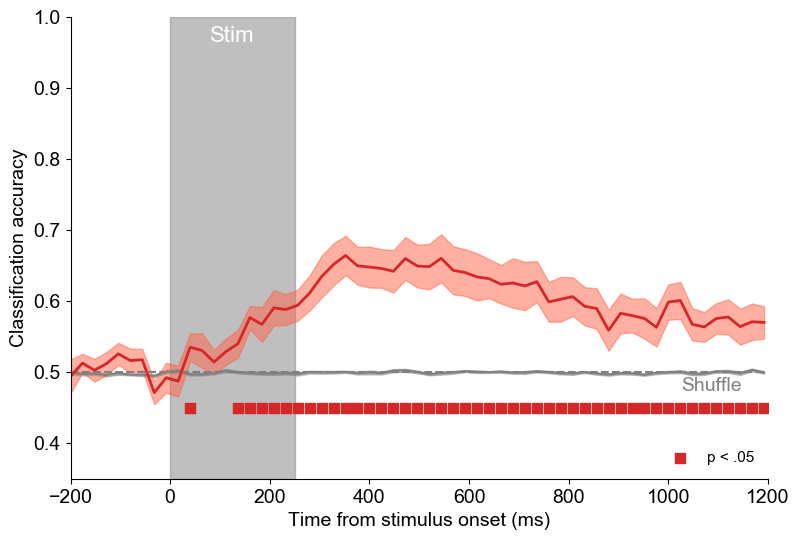

Significant timepoints: [  40  136  160  184  208  232  256  280  304  328  352  376  400  424
  448  472  496  520  544  568  592  616  640  664  688  712  736  760
  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072 1096
 1120 1144 1168 1192]
Mean delay accuracy: 0.6110185294117647
Mean delay S.D.: 0.032774437114493


In [21]:
interp.plot_acc(significance_testing=True,savefig=False,ylim=[.35,1],chance_text_y=.22)